<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/05_projects/Emotion%20Detection%20from%20Text/emotion_detection_from_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Detection from Text

## Dataset
We’re using the **“Emotion Detection from Text”** dataset from Kaggle, which includes thousands of English phrases annotated with basic emotions (like joy, sadness, anger, etc.):

* Source: [Kaggle – Emotion Detection from Text](https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text)


* Contents:

    * `text:` short sentence or phrase

    * `emotion:` label (e.g., happiness, sadness, anger, surprise, fear, neutral)

* Size: ~20,000 samples across 6-8 emotion categories

> This is a perfect dataset for NLP-based emotion classification

## Objectives
* Load and explore the dataset
* Preprocess text (cleaning/tokenization)
* Convert text to features (TF–IDF or embedding)
* Train classification models (e.g., Logistic Regression, Random Forest)
* Evaluate with accuracy, precision/recall, F1-score, and confusion matrix
* Deploy a prediction function for new sentences

## Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Step 2: Load the dataset

In [4]:
from google.colab import files
import pandas as pd

df = pd.read_csv('/content/emotion_detection.csv')  # rename the dataset file accordingly
print(df.shape, df.columns)
df = df[['content', 'sentiment']]

(40000, 3) Index(['tweet_id', 'sentiment', 'content'], dtype='object')


In [5]:
df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,content,sentiment
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral
...,...,...
39995,@JohnLloydTaylor,neutral
39996,Happy Mothers Day All my love,love
39997,Happy Mother's Day to all the mommies out ther...,love
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,happiness


## Step 3: Check class distribution

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64


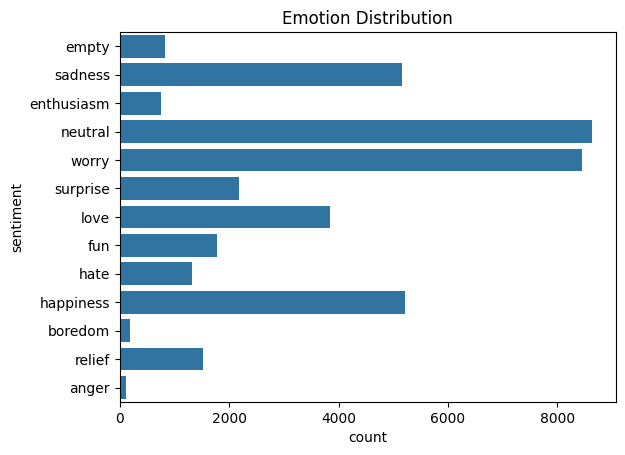

In [6]:
print(df['sentiment'].value_counts())
sns.countplot(y='sentiment', data=df)
plt.title("Emotion Distribution")
plt.show()

## Step 4: Text cleaning function


In [7]:
def clean(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.strip()

df['clean_text'] = df['content'].apply(clean)

In [8]:
# Updated Dataframe
df

,content,sentiment,clean_text
0,@tiffanylue i know i was listenin to bad habi...,empty,tiffanylue i know i was listenin to bad habit...
1,Layin n bed with a headache ughhhh...waitin o...,sadness,layin n bed with a headache ughhhhwaitin on y...
2,Funeral ceremony...gloomy friday...,sadness,funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,enthusiasm,wants to hang out with friends soon
4,@dannycastillo We want to trade with someone w...,neutral,dannycastillo we want to trade with someone wh...
...,...,...,...
39995,@JohnLloydTaylor,neutral,johnlloydtaylor
39996,Happy Mothers Day All my love,love,happy mothers day all my love
39997,Happy Mother's Day to all the mommies out ther...,love,happy mothers day to all the mommies out there...
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,happiness,niariley wassup beautiful follow me peep out ...


## Step 5: Train/Test Split


In [9]:
X = df['clean_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Step 6: Vectorization using TF-IDF

In [10]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Step 7: Train model with class weight balancing

In [11]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

## Step 8: Evaluation

In [12]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       anger     0.0000    0.0000    0.0000        22
     boredom     0.0504    0.1667    0.0774        36
       empty     0.0421    0.1152    0.0617       165
  enthusiasm     0.0272    0.0789    0.0405       152
         fun     0.1365    0.2676    0.1808       355
   happiness     0.3225    0.2466    0.2795      1042
        hate     0.2106    0.4189    0.2803       265
        love     0.4842    0.4583    0.4709       768
     neutral     0.3941    0.2454    0.3024      1728
      relief     0.1213    0.2820    0.1696       305
     sadness     0.3471    0.2933    0.3179      1033
    surprise     0.1441    0.2220    0.1748       437
       worry     0.4221    0.2210    0.2901      1692

    accuracy                         0.2670      8000
   macro avg     0.2079    0.2320    0.2035      8000
weighted avg     0.3348    0.2670    0.2851      8000



### Confusion Matrix

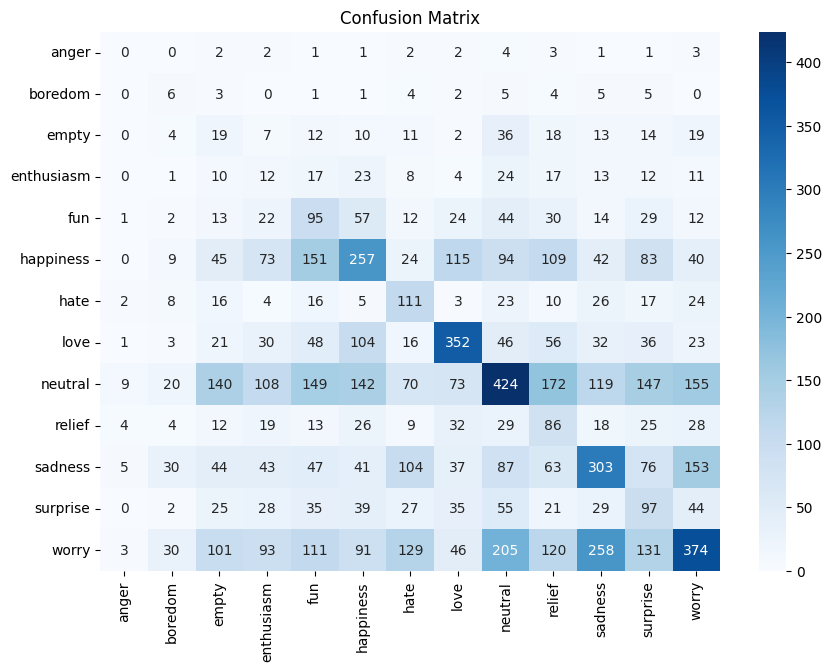

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

## Step 9: Custom Prediction Function

In [14]:
def predict_emotion(text):
    text_clean = clean(text)
    vect = tfidf.transform([text_clean])
    probs = model.predict_proba(vect)[0]
    pred = model.predict(vect)[0]
    results = dict(zip(model.classes_, np.round(probs, 3)))
    print("Prediction Probabilities:")
    for k, v in sorted(results.items(), key=lambda x: -x[1]):
        print(f"{k}: {v}")
    return f"\n🔮 Predicted Emotion: {pred}"

In [20]:
predict_emotion("I feel really excited and proud of myself today.")

Prediction Probabilities:
happiness: 0.34
relief: 0.159
love: 0.154
sadness: 0.077
fun: 0.06
worry: 0.057
enthusiasm: 0.046
surprise: 0.035
boredom: 0.028
neutral: 0.016
hate: 0.013
anger: 0.008
empty: 0.007


'\n🔮 Predicted Emotion: happiness'

## What Does happiness: 0.34 Actually Mean?

Yes, `0.34` means `34%` probability or model confidence in that class.

So when your model outputs:

```text
happiness: 0.34
relief: 0.159
love: 0.154
```

…it’s saying:

> “I’m 34% confident this is happiness. But I’m also 15.9% sure it could be relief, and 15.4% sure it could be love.”


### Should That Number Be Higher?

Not necessarily.

* Multiclass classification (like this one with 13 emotions) naturally spreads probabilities across classes.

* If one class has 34% and the next is 15%, that still indicates a clear winner, even if not extremely confident.

* In binary classification, you'd expect probabilities like 90% or 95% — but in multiclass with overlapping emotions, 30–50% is often enough.

#### Example:

For the sentence:

> “I feel happy and grateful.”

It’s reasonable for the model to split confidence between:

* `happiness`
* `relief`
* `love`

Because emotions often co-occur in natural language.


### Key Insight

> The important thing is not how high the top probability is, but how much higher it is than the others.

In your case:

* `happiness` is 34%

* The next best is relief at 15.9%

> → That’s a big enough gap for a reliable prediction.


#### When Should You Worry?
* If the top two classes are very close (e.g., `joy: 0.26`, `neutral: 0.25`), the model is uncertain.

* If many classes are near 10%, and none stand out, the input may be ambiguous or unseen.

##### Want to Improve Confidence?
* Use `ngram_range=(1,2)` or even `(1,3)` in `TfidfVectorizer`
* Train longer or with more data
* Try BERT for better text understanding
